In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # My fix for 'NameError: name 'url' is not defined' error
    # Starting URL for Weather Map API Call.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | takoradi
Processing Record 2 of Set 1 | ararat
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | sungaipenuh
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 7 of Set 1 | eenhana
Processing Record 8 of Set 1 | walvis bay
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | yantal
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | chuy
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | axim
Processing Record 21 of Set 1 | planeta rica
Proce

Processing Record 38 of Set 4 | san juan
Processing Record 39 of Set 4 | banjar
Processing Record 40 of Set 4 | mbandaka
Processing Record 41 of Set 4 | strezhevoy
Processing Record 42 of Set 4 | luau
Processing Record 43 of Set 4 | yellowknife
Processing Record 44 of Set 4 | port hardy
Processing Record 45 of Set 4 | anadyr
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | mugur-aksy
Processing Record 48 of Set 4 | camacha
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | mstera
Processing Record 1 of Set 5 | khatanga
Processing Record 2 of Set 5 | touros
Processing Record 3 of Set 5 | salta
Processing Record 4 of Set 5 | sur
Processing Record 5 of Set 5 | balimo
City not found. Skipping...
Processing Record 6 of Set 5 | cartagena
Processing Record 7 of Set 5 | ancud
Processing Record 8 of Set 5 | hofn
Processing Record 9 of Set 5 | east london
Processing Record 10 of Set 5 | rosarito
Processing Record 11 of Set 5 | marcona
City not found. 

Processing Record 30 of Set 8 | krasnyy chikoy
Processing Record 31 of Set 8 | dubbo
Processing Record 32 of Set 8 | nabire
Processing Record 33 of Set 8 | chapleau
Processing Record 34 of Set 8 | nome
Processing Record 35 of Set 8 | cuamba
Processing Record 36 of Set 8 | mlonggo
Processing Record 37 of Set 8 | dengzhou
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | kingisepp
Processing Record 40 of Set 8 | marti
Processing Record 41 of Set 8 | sarangani
Processing Record 42 of Set 8 | college
Processing Record 43 of Set 8 | te anau
Processing Record 44 of Set 8 | bereda
Processing Record 45 of Set 8 | opobo
City not found. Skipping...
Processing Record 46 of Set 8 | kerema
Processing Record 47 of Set 8 | saint-augustin
Processing Record 48 of Set 8 | morondava
Processing Record 49 of Set 8 | hambantota
Processing Record 50 of Set 8 | maragogi
Processing Record 1 of Set 9 | shangrao
Processing Record 2 of Set 9 | katherine
Processing Record 3 of Set 9 | bubaque

Processing Record 14 of Set 12 | port blair
Processing Record 15 of Set 12 | iquique
Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | panzhihua
Processing Record 18 of Set 12 | kaifeng
Processing Record 19 of Set 12 | izhma
Processing Record 20 of Set 12 | san cristobal
Processing Record 21 of Set 12 | karabuk
Processing Record 22 of Set 12 | dandong
Processing Record 23 of Set 12 | lazaro cardenas
Processing Record 24 of Set 12 | bismarck
Processing Record 25 of Set 12 | tiarei
Processing Record 26 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 27 of Set 12 | chichimila
Processing Record 28 of Set 12 | kirkwall
Processing Record 29 of Set 12 | akdepe
Processing Record 30 of Set 12 | zhuanghe
Processing Record 31 of Set 12 | sentyabrskiy
City not found. Skipping...
Processing Record 32 of Set 12 | villefranche-de-rouergue
Processing Record 33 of Set 12 | machali
Processing Record 34 of Set 12 | fortuna
Processing Record 35 of Set 12 | hearst

In [9]:
len(city_data)

568

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Takoradi,4.88,-1.76,81.12,81,13,9.57,GH,2020-12-29 19:29:50
1,Ararat,39.83,44.70,17.60,85,0,2.24,AM,2020-12-29 19:29:50
2,Codrington,-38.27,141.97,54.43,93,100,3.11,AU,2020-12-29 19:29:51
3,Sungaipenuh,-2.08,101.38,65.16,91,88,2.35,ID,2020-12-29 19:29:51
4,Eenhana,-17.47,16.33,82.40,58,100,2.24,NA,2020-12-29 19:29:52
5,Walvis Bay,-22.96,14.51,66.20,72,100,6.93,NA,2020-12-29 19:29:52
6,Castro,-24.79,-50.01,73.94,85,91,7.18,BR,2020-12-29 19:26:12
7,Mataura,-46.19,168.86,57.99,93,100,5.01,NZ,2020-12-29 19:29:52
8,Jamestown,42.10,-79.24,27.00,73,90,9.17,US,2020-12-29 19:26:57
9,Ushuaia,-54.80,-68.30,53.60,58,20,4.70,AR,2020-12-29 19:25:53


In [11]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
# Assign same DataFrame with new column order
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Takoradi,GH,2020-12-29 19:29:50,4.88,-1.76,81.12,81,13,9.57
1,Ararat,AM,2020-12-29 19:29:50,39.83,44.70,17.60,85,0,2.24
2,Codrington,AU,2020-12-29 19:29:51,-38.27,141.97,54.43,93,100,3.11
3,Sungaipenuh,ID,2020-12-29 19:29:51,-2.08,101.38,65.16,91,88,2.35
4,Eenhana,NA,2020-12-29 19:29:52,-17.47,16.33,82.40,58,100,2.24
...,...,...,...,...,...,...,...,...,...
563,Urengoy,RU,2020-12-29 19:32:12,65.97,78.37,-12.26,88,100,13.20
564,Datong,CN,2020-12-29 19:32:12,40.09,113.29,-3.44,63,0,13.69
565,Kalevala,RU,2020-12-29 19:32:12,65.20,31.17,24.06,97,100,9.42
566,Kurilsk,RU,2020-12-29 19:32:13,45.23,147.88,18.77,85,100,10.78


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

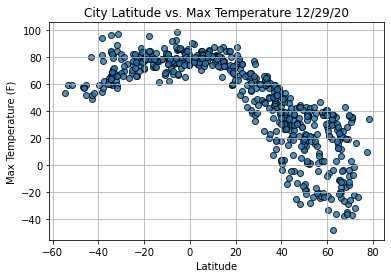

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


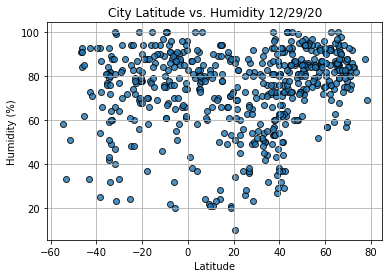

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

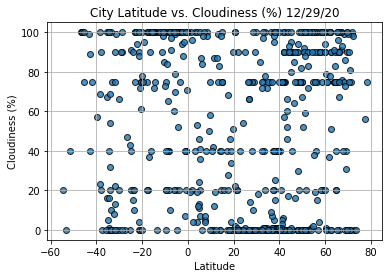

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

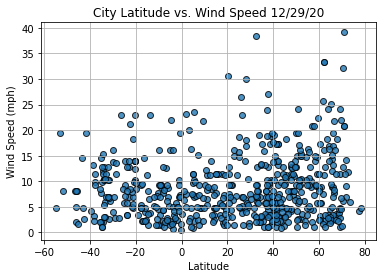

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Chuy
Country                        UY
Date          2020-12-29 19:27:23
Lat                         -33.7
Lng                        -53.46
Max Temp                    81.77
Humidity                       49
Cloudiness                      0
Wind Speed                  10.36
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Takoradi,GH,2020-12-29 19:29:50,4.88,-1.76,81.12,81,13,9.57
1,Ararat,AM,2020-12-29 19:29:50,39.83,44.70,17.60,85,0,2.24
8,Jamestown,US,2020-12-29 19:26:57,42.10,-79.24,27.00,73,90,9.17
10,Yantal,RU,2020-12-29 19:29:53,56.85,105.25,-24.07,80,0,2.04
16,Axim,GH,2020-12-29 19:29:54,4.87,-2.24,80.73,80,46,7.38


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

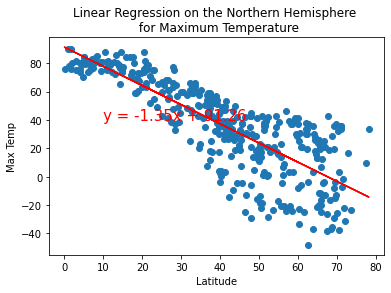

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

In [24]:
linregress(x_values, y_values)

LinregressResult(slope=-1.3503078915041087, intercept=91.25588782285833, rvalue=-0.8177440627422803, pvalue=2.5908399454990553e-96, stderr=0.04794312525953677)

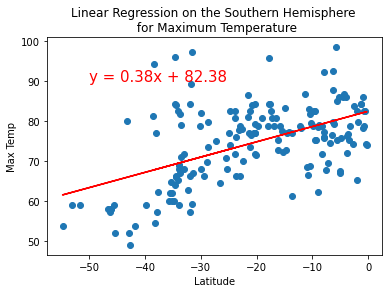

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

In [26]:
linregress(x_values, y_values)

LinregressResult(slope=0.38126595414298736, intercept=82.3780175091504, rvalue=0.5272893076381785, pvalue=9.112676014119413e-14, stderr=0.04698285180778067)

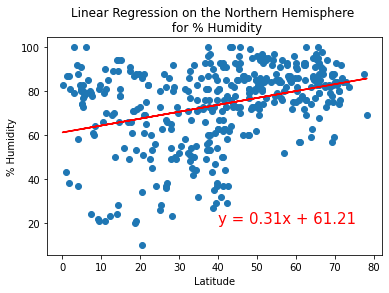

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,20))

In [28]:
linregress(x_values, y_values)

LinregressResult(slope=0.3140314287960105, intercept=61.21278799159846, rvalue=0.33473960980138584, pvalue=8.506065797159262e-12, stderr=0.044592707507706705)

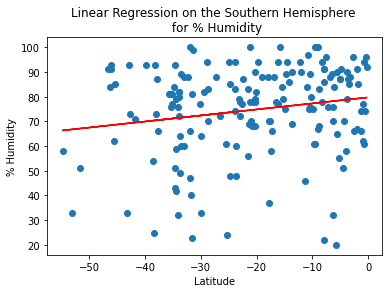

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

In [30]:
linregress(x_values, y_values)

LinregressResult(slope=0.2439836767471989, intercept=79.71048515480315, rvalue=0.18175455598389478, pvalue=0.016700054470965918, stderr=0.10094454412654885)

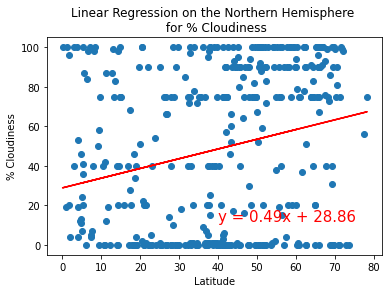

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,12))

In [32]:
linregress(x_values, y_values)

LinregressResult(slope=0.49190961530178423, intercept=28.855464729093413, rvalue=0.23910882606337175, pvalue=1.5318239133911498e-06, stderr=0.10076493469797515)

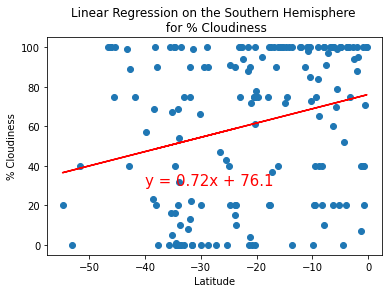

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-40,30))

In [34]:
linregress(x_values, y_values)

LinregressResult(slope=0.7220277451562949, intercept=76.09870531938438, rvalue=0.2538922510362151, pvalue=0.0007499775164143329, stderr=0.2103474587555564)

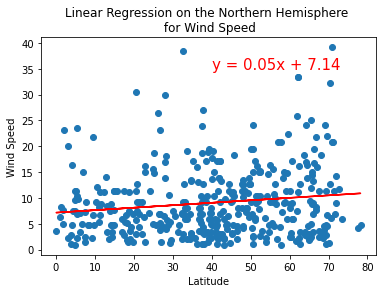

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

In [37]:
linregress(x_values, y_values)

LinregressResult(slope=0.04772462894733108, intercept=7.139689938177455, rvalue=0.14053821860131974, pvalue=0.005138986578551949, stderr=0.016959773463891922)

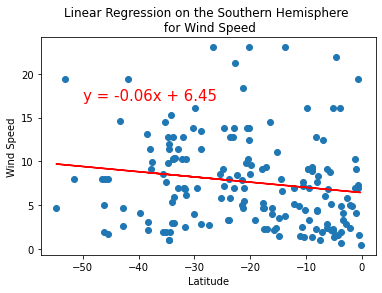

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,17))

In [41]:
linregress(x_values, y_values)

LinregressResult(slope=-0.05958105305537146, intercept=6.445472590526224, rvalue=-0.15792249363239458, pvalue=0.037974714202559504, stderr=0.028489308312960936)